### Import Libraries

In [37]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import adfuller, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from pmdarima import auto_arima

#import warnings
#warnings.simplefilter(action="ignore")

# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Import Data

In [38]:
# Import the dataset
data = pd.read_csv("../datasets/data_features.csv")

In [39]:
# Check the data
data.head()

,time,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends,s_ratio,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2018-04-08,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,1,0,0,0,0,0,0,0,0
1,2018-04-15,56,0.0,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20.0,0.725367,0,0,1,0,0,0,0,0,0,0,0
2,2018-04-22,55,0.0,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18.0,0.725189,0,0,1,0,0,0,0,0,0,0,0
3,2018-04-29,74,0.0,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21.0,0.725087,0,0,1,0,0,0,0,0,0,0,0
4,2018-05-06,62,0.0,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23.0,0.724806,0,0,0,1,0,0,0,0,0,0,0


In [40]:
# Check the shape of the data
data.shape

(257, 25)

In [41]:
# Look at the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       257 non-null    object 
 1   dengue_cases               257 non-null    int64  
 2   denv_1                     256 non-null    float64
 3   denv_2                     256 non-null    float64
 4   denv_3                     256 non-null    float64
 5   denv_4                     256 non-null    float64
 6   Mean Temperature (°C)      256 non-null    float64
 7   Mean Wind Speed (km/h)     256 non-null    float64
 8   Daily Rainfall Total (mm)  256 non-null    float64
 9   Maximum Temperature (°C)   256 non-null    float64
 10  Max Wind Speed (km/h)      256 non-null    float64
 11  Minimum Temperature (°C)   256 non-null    float64
 12  google_trends              256 non-null    float64
 13  s_ratio                    257 non-null    float64

### Date Processing

The date feature is currently an object time. We will be converting it into a dateTime format.

In [42]:
# Convert the date column into dateTime format
data['time'] = pd.to_datetime(data['time'])

In [43]:
# Set the time as the index
data = data.set_index('time')

In [44]:
# Check the data 
data.head()

,dengue_cases,denv_1,denv_2,denv_3,denv_4,Mean Temperature (°C),Mean Wind Speed (km/h),Daily Rainfall Total (mm),Maximum Temperature (°C),Max Wind Speed (km/h),Minimum Temperature (°C),google_trends,s_ratio,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
time,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-08,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,1,0,0,0,0,0,0,0,0
2018-04-15,56,0.0,0.505,0.484,0.011,28.528571,10.714286,0.742857,33.8,36.7,25.5,20.0,0.725367,0,0,1,0,0,0,0,0,0,0,0
2018-04-22,55,0.0,0.505,0.484,0.011,28.914286,9.828571,2.057143,34.4,38.2,24.6,18.0,0.725189,0,0,1,0,0,0,0,0,0,0,0
2018-04-29,74,0.0,0.505,0.484,0.011,28.142857,7.700000,0.371429,34.3,37.1,25.5,21.0,0.725087,0,0,1,0,0,0,0,0,0,0,0
2018-05-06,62,0.0,0.505,0.484,0.011,28.414286,6.842857,4.800000,35.0,43.6,22.6,23.0,0.724806,0,0,0,1,0,0,0,0,0,0,0


In [45]:
# set frequency of data
data = data.asfreq('W-SUN')

# remove first row
data = data[1:]

In [46]:
# drop unnecessary rows
data.drop(columns=['denv_1', 'denv_2', 'denv_3', 'denv_4', 
                   'Mean Temperature (°C)', 'Mean Wind Speed (km/h)',
                   'Maximum Temperature (°C)', 'Max Wind Speed (km/h)'
                  ],
          inplace=True
         )

### Train/Test Split

Given that this is a time series, we do a 30% train test split by time
* Train: ~75% of data - 2018 to 2021
* Test: ~25% of data - 2022 to 2023

In [47]:
# with 257 datapoints, the 195th data point is the end of 2018 and coincides with 75th percentile of datapoints by time
195/257

0.7587548638132295

In [48]:
# Train data will coveer 2018 to 2021
train = data.iloc[:195]

# Test data will cover 2022 to March 2023
test = data.iloc[195:]

In [49]:
train.shape

(195, 16)

In [50]:
test.shape

(61, 16)

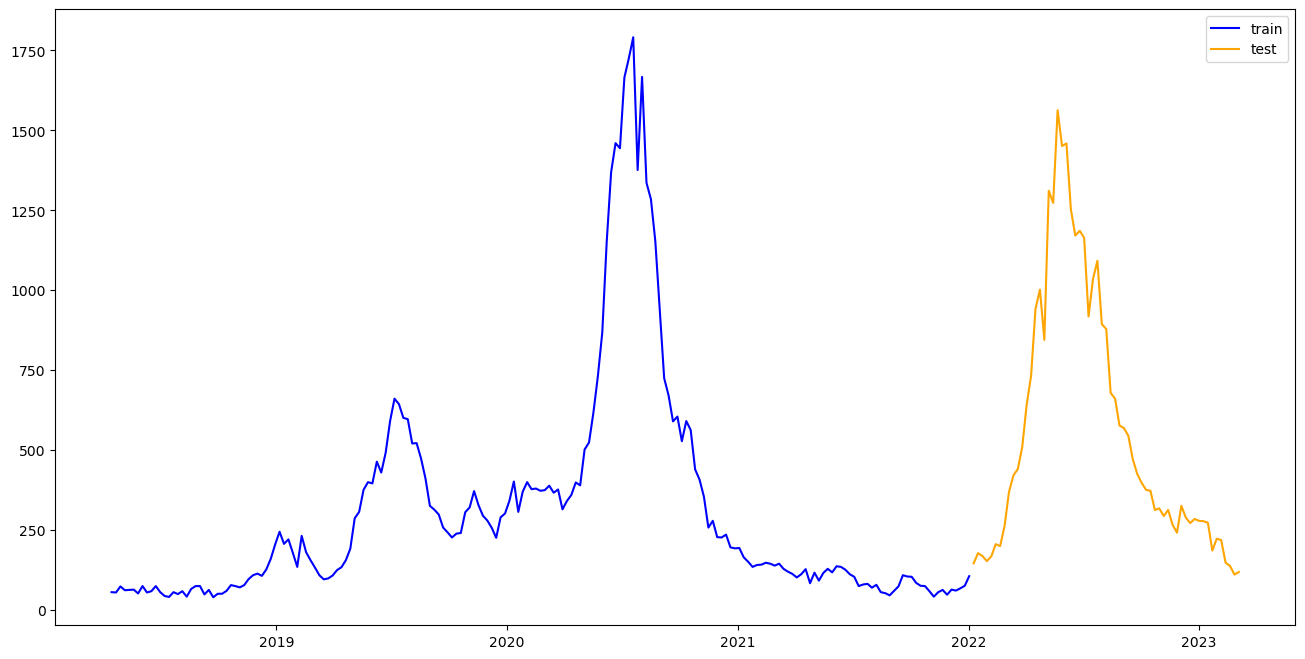

In [51]:
# Time series plot of the train and test data
def train_test_plot(train, test):
    plt.figure(figsize=(16, 8))
    
    plt.plot(train[['dengue_cases']], c='blue')
    plt.plot(test[['dengue_cases']], c='orange')
    
    plt.legend(['train', 'test'])
    
    plt.show()
    
train_test_plot(train, test)

### Stationarity Test

We will use the stationarity test to identify the $d$ parameter for the ARIMA model

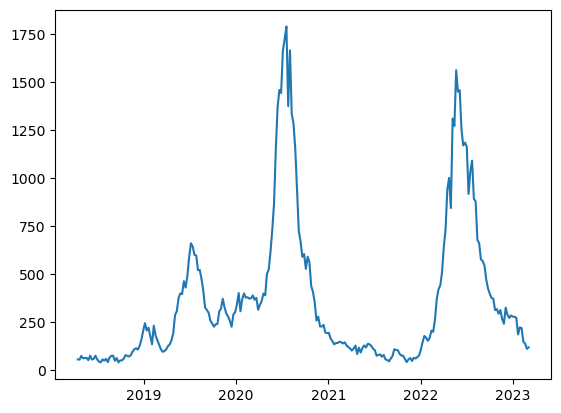

In [52]:
# Plot the data
plt.plot(data['dengue_cases']);

The time series of the dengue cases is clearly not stationary

In [53]:
# Instantiate a new dataframe for the difference information
diff = pd.DataFrame()

In [54]:
# Calculate the first difference of the dengue cases
diff['first_diff_dengue'] = data['dengue_cases'].diff()

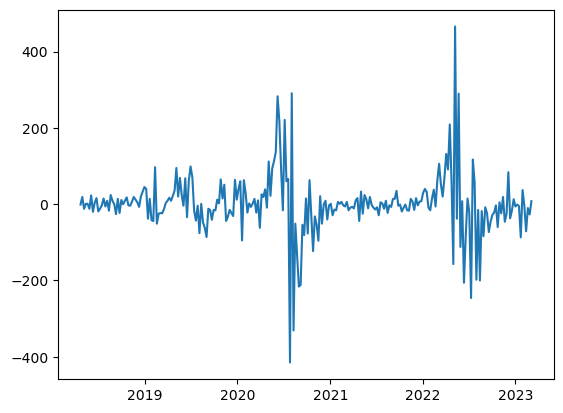

In [55]:
# Plot the first difference of the dengue cases
plt.plot(diff['first_diff_dengue']);

From the plot above, we can see that when the data is differenced once, the data is stationary. 

#### Augmented Dickey-Fuller Test

Let's also use the ADF test to test for stationarity, where the null hypothesis $H_0$ is that the data is not stationary

In [56]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [57]:
# Run the ADF test on the original dengue data
interpret_dftest(adfuller(data['dengue_cases']))

Test Statistic   -2.568546
p-value           0.099674
dtype: float64

The p-value is above 0.05, hence we cannot reject $H_0$, i.e. this data is not stationary.

In [58]:
# Run the ADF test on the differenced dengue data
interpret_dftest(adfuller(data['dengue_cases'].diff().dropna()))

Test Statistic   -5.230315
p-value           0.000008
dtype: float64

The p-value is below 0.05 and we can conclude that the once differenced data is stationary. This is also in line with the differenced data plot. Hence, we can set the $d$ value to $1$.

### Finding the $p$ and $q$ values

We build upon the results of the ARIMAX model, i.e. use $(1,1,2)$ for the $p$, $d$ and $q$ values.

Similarly, we set $D$ of the seasonal hyperparameters to 1.

We then run multiple iterations to tune the $P$, $Q$ and $S$ values.

#### ACF and PACF Plot for $p$ value

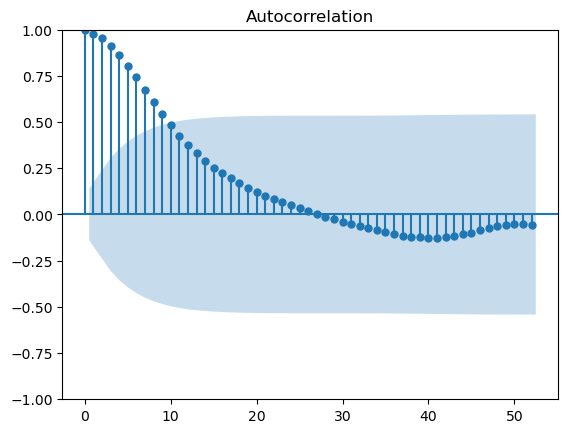

In [59]:
# Generate autocorrelation plot on training data.
plot_acf(train['dengue_cases'], lags = 52);

C:\ProgramData\Anaconda3\envs\dsi-sg\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


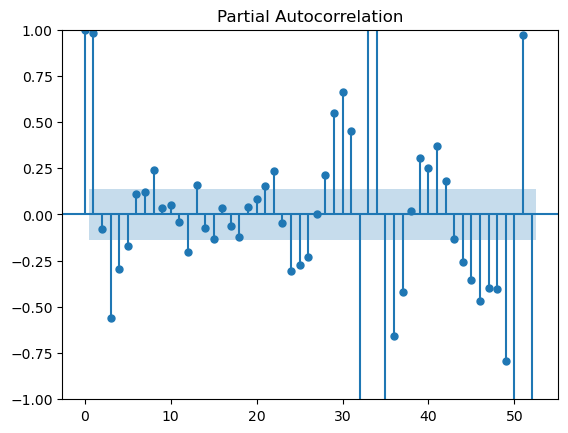

In [60]:
# Generate partial autocorrelation plot on training data.
plot_pacf(train['dengue_cases'], lags = 52);

In [61]:
# function to plot ccf
def plot_ccf(x, y, lags=None, ax=None):
    
    ccf_output = ccf(x[::-1], y[::-1], adjusted=False)
    
    #plt.stem(range(-len(ccf_output)//2, len(ccf_output)//2), ccf_output)
    if ax==None:
        plt.stem(range(len(ccf_output)), ccf_output)

        if lags == None:
            pass
        else:
            plt.xlim([0,lags])

        plt.ylim([-1,1])
        plt.xlabel('Lag')
        plt.ylabel('CCF')
        # 95% UCL / LCL
        plt.axhline(-1.96/np.sqrt(len(x)), color='k', ls='--') 
        plt.axhline(1.96/np.sqrt(len(x)), color='k', ls='--')

        plt.show()
    
    else:
        ax.stem(range(len(ccf_output)), ccf_output)

        if lags == None:
            pass
        else:
            ax.set_xlim([0,lags])

        ax.set_ylim([-1,1])
        ax.set_xlabel('Lag')
        ax.set_ylabel('CCF')
        # 95% UCL / LCL
        ax.axhline(-1.96/np.sqrt(len(x)), color='k', ls='--') 
        ax.axhline(1.96/np.sqrt(len(x)), color='k', ls='--')

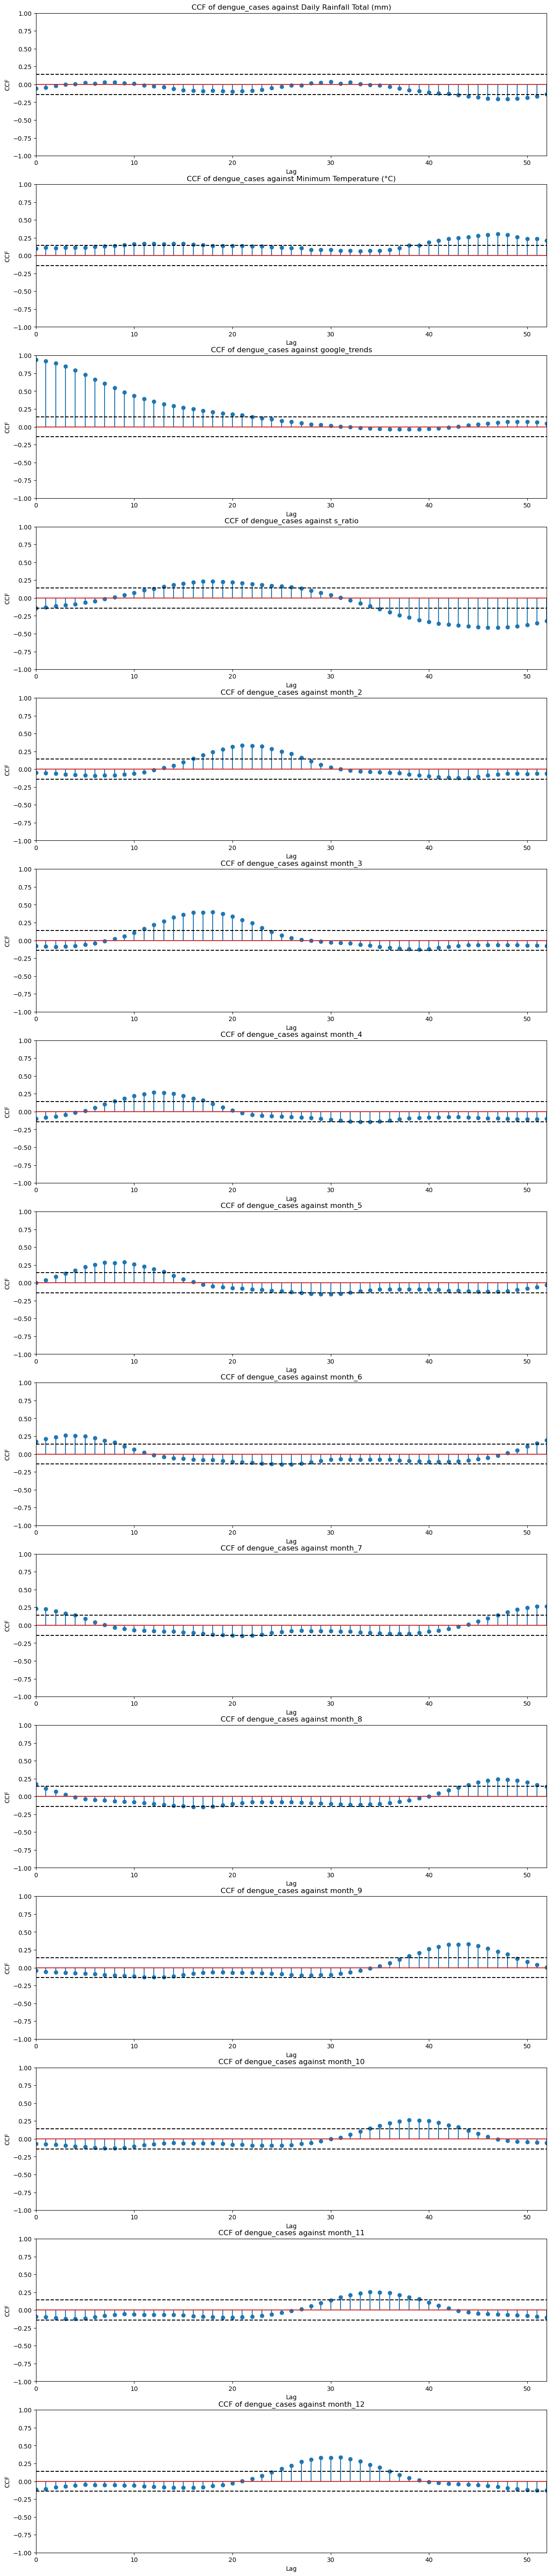

In [62]:
# Generate cross correlation between predictor variables and dengue cases
# do a plot for each of the variables
n_plots = len(train.columns)-1

fig, axes = plt.subplots(nrows=n_plots, figsize=(15,5*n_plots))

for i, x in enumerate(train.drop(columns='dengue_cases')):
    axes[i].set_title(f'CCF of dengue_cases against {x}')
    plot_ccf(train[x], train['dengue_cases'], lags=52, ax=axes[i])

The first lag of the ACF plot is also positive. There is also a sharp cut off in the PACF plot after the second lag. Hence, we can take the next lag of the PACF as the $p$ value and set it to $3$. 

As the $AR$ and $MA$ terms might work against each other and we were able to identify the $p$ value, we will set the $q$ value as $0$.  

### SARIMAX Model

We note that there seem to be long term seasonality in the train data around annual level (lags of around 30, 40 and 50 weeks in PACF plot). 

Coefficients of PACF going beyong the range of -1 and 1 can also indicate that there is non-linear relationship triggered by other variables. Based on external research, the emergence of DENV-3 which the population has low herd immunity and weather conditions are contributing factors to the outbreak in 2020. These may be the variables that contributed to the non-linear autocorrelation. as such, we will need to include the x variables in the model for a better prediction and we will use SARIMAX only.

Best results so far:
|Model | Specs | AIC
|----|----|----|
ARIMAX w month dummies | (1,1,2)(0,0,0,0) | 2167.890
SARIMAX w month dummies | (1,1,2)(1,1,0,51) | 1692.619
ARIMAX w month dummies & s_ratio | (1,1,2)(0,0,0,0) | 2157
SARIMAX w month dummies & s_ratio | (1,1,2)(1,1,0,51) | 1107.117
ARIMAX w month dummies & s_ratio & drop most weather | (1,1,2)(0,0,0,0) | 2153.957
SARIMAX w month dummies & s_ratio & drop most weather | (1,1,2)(1,1,0,51) | 1100.610

In [ ]:
model_sarimax = auto_arima(train['dengue_cases'], exogenous=train.drop(columns=['dengue_cases']), 
                           d=1, max_p=3, max_q=3, seasonal=False, #m=29, max_P=5, max_Q=5, #max_order=52+5,
                           trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2155.546, Time=4.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2208.027, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2210.002, Time=2.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2210.018, Time=1.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2206.027, Time=2.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2153.957, Time=3.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2174.249, Time=4.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2193.502, Time=2.93 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2156.985, Time=4.84 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2169.552, Time=4.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2160.100, Time=3.52 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2156.626, Time=5.31 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2151.873, Time=3.57 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2172.242, Time=2.35 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [ ]:
# we pin down p,d,q and further tune the P, D, Q parameters
#model_sarimax = auto_arima(train['dengue_cases'], exogenous=train.drop(columns=['dengue_cases']), 
#                           start_p=1, max_p=1, max_q=2, d=1,
#                           seasonal=True, m=52, max_P=2, max_Q=2, max_order=6,
#                           trace=True, error_action='ignore', suppress_warnings=True)

In [ ]:
%%time
model = SARIMAX(endog=train['dengue_cases'], exog=train.drop(columns=['dengue_cases']),
                dates=train.index,
                order=(1,1,2),
                seasonal_order=(1,1,0,51),
                enforce_stationarity=False, # speed up model fitting
                enforce_invertibility=False # speed up model fitting
               )

results = model.fit(maxiter=50, method='lbfgs')

In [ ]:
results.mle_retvals

In [ ]:
results.summary()

In [ ]:
preds_auto = results.predict(start=test.index[0], end=test.index[-1],
                           exog=test.drop(columns=['dengue_cases']))

In [ ]:
# Plot data.
plt.figure(figsize=(10,6))

# Plot training data in blue.
plt.plot(train['dengue_cases'], color = 'blue')

# Plot testing data in orange.
plt.plot(test['dengue_cases'], color = 'orange')

# Plot predicted values in green.
plt.plot(preds_auto, color = 'green')

plt.title(label = 'Dengue Cases Predictions with SARIMAX', fontsize=18)
plt.show();

In [ ]:
# Evaluation of the model
error = round(mean_squared_error(test['dengue_cases'], preds_auto, squared=False), 0)
print(f'Minimum Dengue Cases: {round(data["dengue_cases"].min(),0)}')
print(f'Maximum Dengue Cases: {round(data["dengue_cases"].max(),0)}')

print(f'RMSE: {error}')
print(f'RMSE relative to minimum values in dengue cases: {round(error / data["dengue_cases"].min(),0)}.')
print(f'RMSE relative to maximum values in dengue cases: {round(error / data["dengue_cases"].max(),0)}.')

Looking at the MSE values as well as the ratio of the mean squared error to the minimum and maximum values in the dengue cases, we can see that the model is not very good. 

#### Residual Plot

In [ ]:
# Set figure size.
plt.figure(figsize=(16,10))

# Calculate residuals.
resids = test['dengue_cases'].values - preds_auto.values

# Generate scatterplot of residuals.
plt.scatter(test['dengue_cases'].index, resids, c ='red')

# Plot baseline at y=0.
plt.hlines(y = 0,
           xmin = test['dengue_cases'].index.min(),
           xmax = test['dengue_cases'].index.max(),
           linestyles = '--')

# Set labels and axes.
plt.xticks(fontsize=20)
plt.xlim(test['dengue_cases'].index.min(), test['dengue_cases'].index.max())
plt.yticks(fontsize=14)
plt.ylabel('Residuals', fontsize = 20);

From the residual plot, we can see that the prediction is off to a high degree.